## Lectura Indiana




Lectura de los archivos de reviews de Indiana


In [1]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lectura de archivos json de las reviews efectuadas en el estado de Indiana . Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\1.json', lines= True)
df_2 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\2.json', lines= True)
df_3 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\3.json', lines= True)
df_4 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\4.json', lines= True)
df_5 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\5.json', lines= True)
df_6 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\6.json', lines= True)
df_7 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\7.json', lines= True)
df_8 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\8.json', lines= True)
df_9 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\9.json', lines= True)
df_10 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\10.json', lines= True)
df_11 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\11.json', lines= True)
df_12 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\12.json', lines= True)
df_13 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\13.json', lines= True)
df_14 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\14.json', lines= True)
df_15 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\reviews-estados\review-Indiana\15.json', lines= True)






In [3]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 15):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_Indiana = pd.concat(dfs, ignore_index=True)

In [4]:
# Vista primeros registros
reviews_Indiana.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.114237e+20,Larry Sandefur,1615400502414,5,Majestic security was the best job I ever had ...,None,"{'time': 1627580537714, 'text': 'Thanks for th...",0x8816c4b2fb8fb6a1:0x80451636e10ca83f
1,1.135966e+20,John Soard,1597280425295,5,I have used this company for a number of years...,None,"{'time': 1606930574545, 'text': 'Thanks John, ...",0x8816c4b2fb8fb6a1:0x80451636e10ca83f
2,1.008217e+20,Michael Johnson,1596678908723,5,"I am an employee with Majestic Security, and h...",None,"{'time': 1606930806337, 'text': 'Thanks Mike f...",0x8816c4b2fb8fb6a1:0x80451636e10ca83f


In [5]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_Indiana.shape

(2100000, 8)

In [6]:
# Miro el tipo de información

reviews_Indiana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100000 entries, 0 to 2099999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 128.2+ MB


In [7]:
# Checkeo de nulos y su porcentaje

nulls_FL = pd.DataFrame(reviews_Indiana.isnull().sum().sort_values(ascending = False))
nulls_FL["Porcentaje de nulos"] = round(nulls_FL/reviews_Indiana.shape[0]*100,2)
nulls_FL.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,2055723,97.89
resp,1838285,87.54
text,941362,44.83
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [8]:
columnas= ['pics', 'resp']
reviews_Indiana= reviews_Indiana.drop(columns=columnas)

In [9]:
reviews_Indiana.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'gmap_id'], dtype='object')

In [10]:
reviews_Indiana.dropna(inplace=True)

In [11]:
usuarios= reviews_Indiana.user_id.nunique()

In [12]:
reviews= reviews_Indiana.text.count()

In [13]:
print('En el estado de Indiana, tenemos',usuarios,' usuarios que dejaron',reviews, 'reseñas.')

En el estado de Indiana, tenemos 204605  usuarios que dejaron 1158638 reseñas.


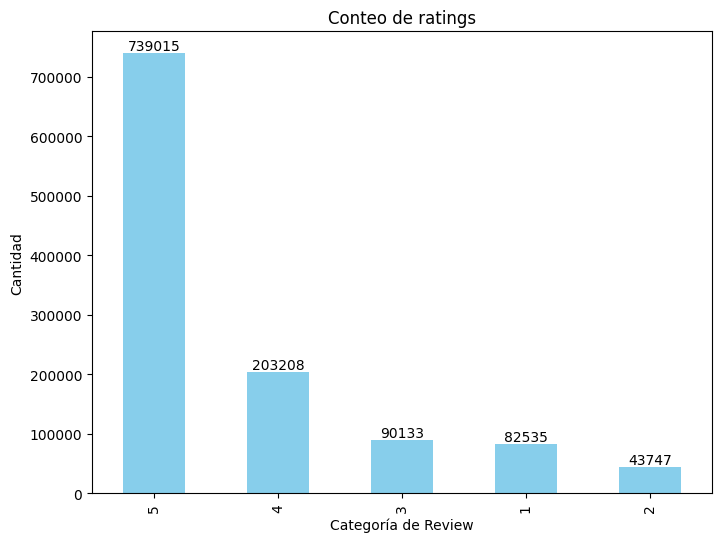

In [14]:
rating = reviews_Indiana.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [15]:
reviews_Indiana['time'] = pd.to_datetime(reviews_Indiana['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [16]:
reviews_Indiana['time'] = pd.to_datetime(reviews_Indiana['time'], format='%d/%m/%Y')

reviews_Indiana['year'] = reviews_Indiana['time'].dt.year

In [17]:
min_date = reviews_Indiana.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

2007-06-20 00:00:00
2007-06-20 00:00:00


In [18]:
max_date = reviews_Indiana.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

2021-09-07 00:00:00
2021-09-07 00:00:00


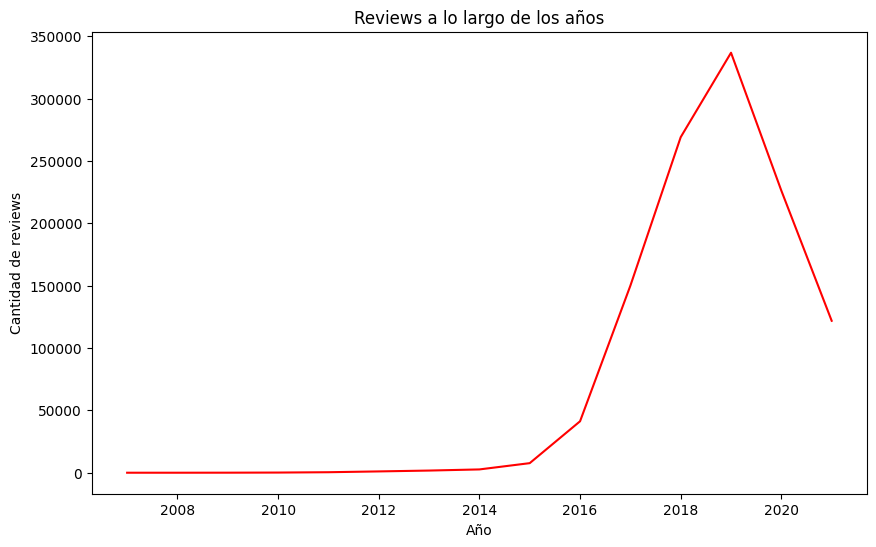

In [19]:
conteo_por_año= reviews_Indiana[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [20]:
reviews_Indiana["text"] = reviews_Indiana["text"].astype(str)

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flori\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


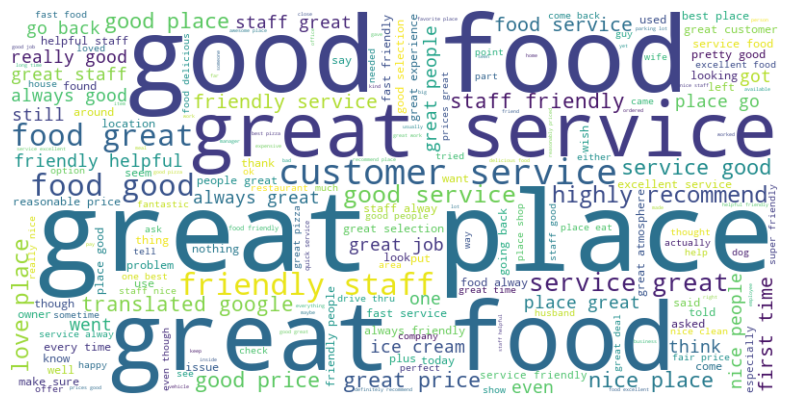

In [22]:
# Assuming you have a DataFrame named "reviews_XXXXXXXXXXXXXXXXXX" with a "text" column
texto = " ".join(reviews_Indiana["text"])

# Download NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization and removing stopwords
stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Join the words into a text string
texto_procesado = " ".join(words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
